## Loading file and Preprocessing

In [242]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [243]:
# reading csv and printing basic informations
df=pd.read_csv("AEP_hourly.csv")

In [244]:
df.head(5)

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [245]:
df.shape

(121273, 2)

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB


In [247]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


In [248]:
df.isnull().sum()

Datetime    0
AEP_MW      0
dtype: int64

In [249]:
# adding different columns to csv for more information

df["Day"]=pd.to_datetime(df["Datetime"]).dt.day
df["Month"]=pd.to_datetime(df["Datetime"]).dt.month
df["Year"]=pd.to_datetime(df["Datetime"]).dt.year
df["Date"]=pd.to_datetime(df["Datetime"]).dt.date
df["Time"]=pd.to_datetime(df["Datetime"]).dt.time
df.head()

,Datetime,AEP_MW,Day,Month,Year,Date,Time,Day_Name
0,2004-12-31 01:00:00,13478.0,31,12,2004,2004-12-31,01:00:00,Friday
1,2004-12-31 02:00:00,12865.0,31,12,2004,2004-12-31,02:00:00,Friday
2,2004-12-31 03:00:00,12577.0,31,12,2004,2004-12-31,03:00:00,Friday
3,2004-12-31 04:00:00,12517.0,31,12,2004,2004-12-31,04:00:00,Friday
4,2004-12-31 05:00:00,12670.0,31,12,2004,2004-12-31,05:00:00,Friday


## Exploratory Data Analysis

In [250]:
# prnting the no. of years

print("All years are : ",df.Year.unique())
print("Total no. of years in dataset : ",df.Year.nunique())

All years are :  [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]
Total no. of years in dataset :  15


Text(0.5, 1.0, 'Energy used (yearwise)')

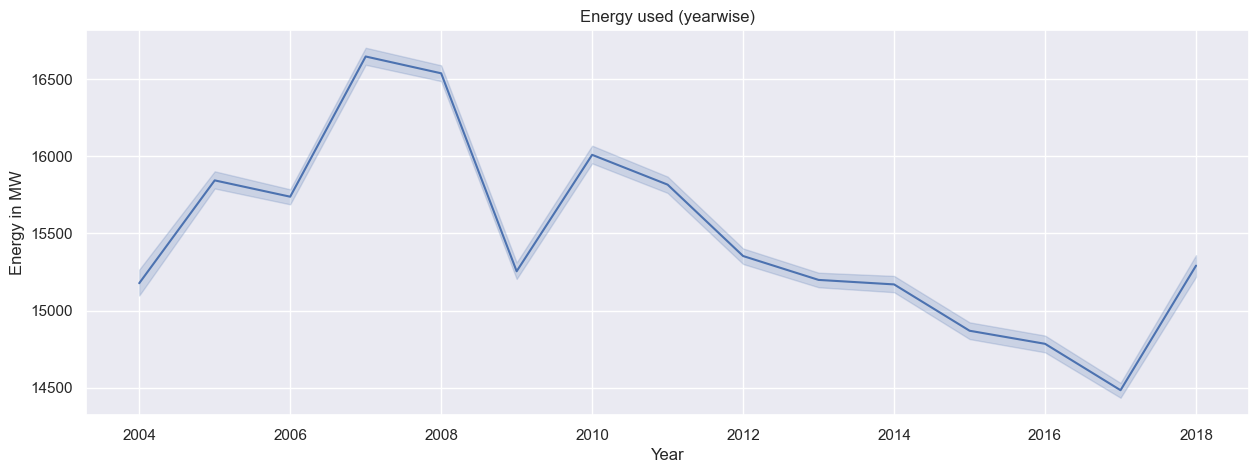

In [251]:
# plotting usage of energy yearwise
plt.figure(figsize=(15,5))
sns.lineplot(x="Year",y="AEP_MW",data=df)
plt.ylabel("Energy in MW")
plt.grid(True)
plt.title("Energy used (yearwise)")


Date and Time of Maximum Energy Consumption

In [252]:
df[df["AEP_MW"]==df["AEP_MW"].max()]

,Datetime,AEP_MW,Day,Month,Year,Date,Time,Day_Name
30221,2008-10-20 14:00:00,25695.0,20,10,2008,2008-10-20,14:00:00,Monday


Date and Time of Minimum Energy Consumption

In [253]:
df[df["AEP_MW"]==df["AEP_MW"].min()]

,Datetime,AEP_MW,Day,Month,Year,Date,Time,Day_Name
100759,2016-10-02 05:00:00,9581.0,2,10,2016,2016-10-02,05:00:00,Sunday


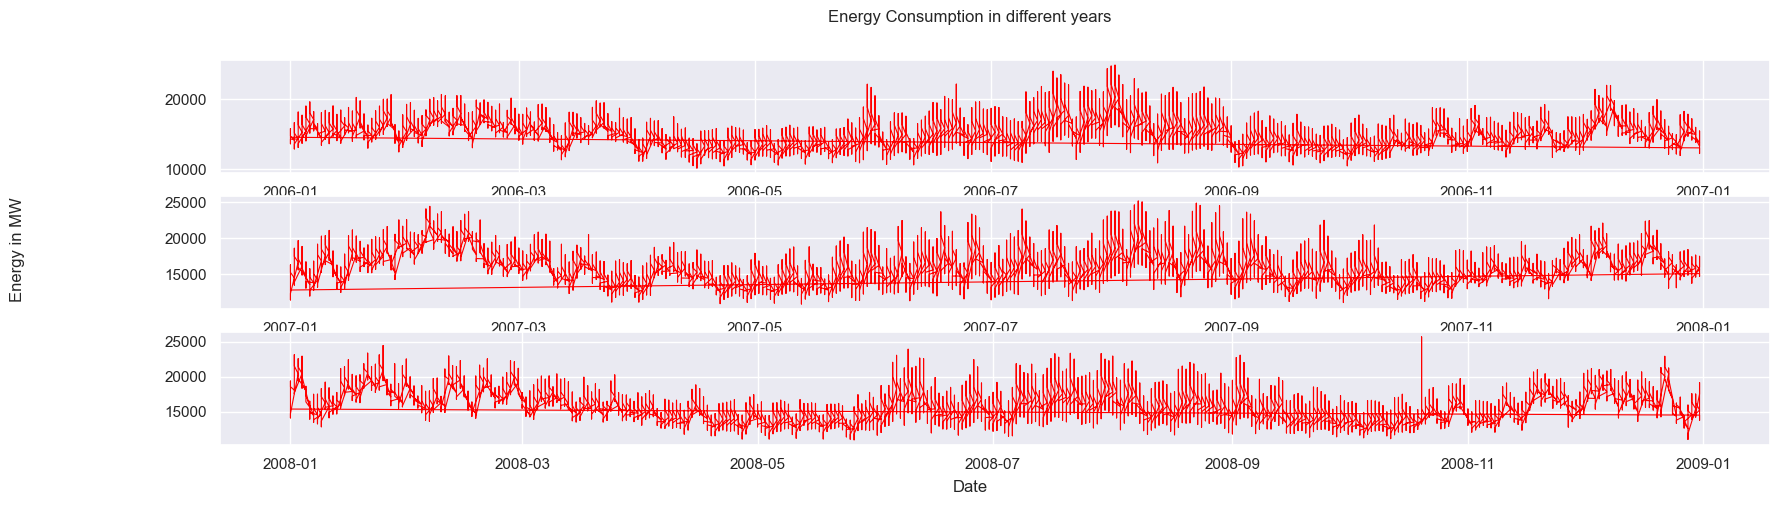

In [254]:
# plotting energy consumption of years where it was maximum

from matplotlib import style
fig=plt.figure()

ax1=fig.add_subplot(311)
ax2=fig.add_subplot(312)
ax3=fig.add_subplot(313)

style.use('ggplot')

y_2006=df.query("Year==2006")["AEP_MW"].to_list()
x_2006=df.query("Year==2006")["Date"].to_list()
ax1.plot(x_2006,y_2006,color="red",linewidth=0.8)


y_2007=df.query("Year==2007")["AEP_MW"].to_list()
x_2007=df.query("Year==2007")["Date"].to_list()
ax2.plot(x_2007,y_2007,color="red",linewidth=0.8)

y_2008=df.query("Year==2008")["AEP_MW"].to_list()
x_2008=df.query("Year==2008")["Date"].to_list()
ax3.plot(x_2008,y_2008,color="red",linewidth=0.8)

plt.rcParams["figure.figsize"]=(15,8)

fig.suptitle("Energy Consumption in different years")
fig.supxlabel('Date')
fig.supylabel('Energy in MW')
plt.grid(True)


Text(0.5, 1.0, 'Energy Distribution')

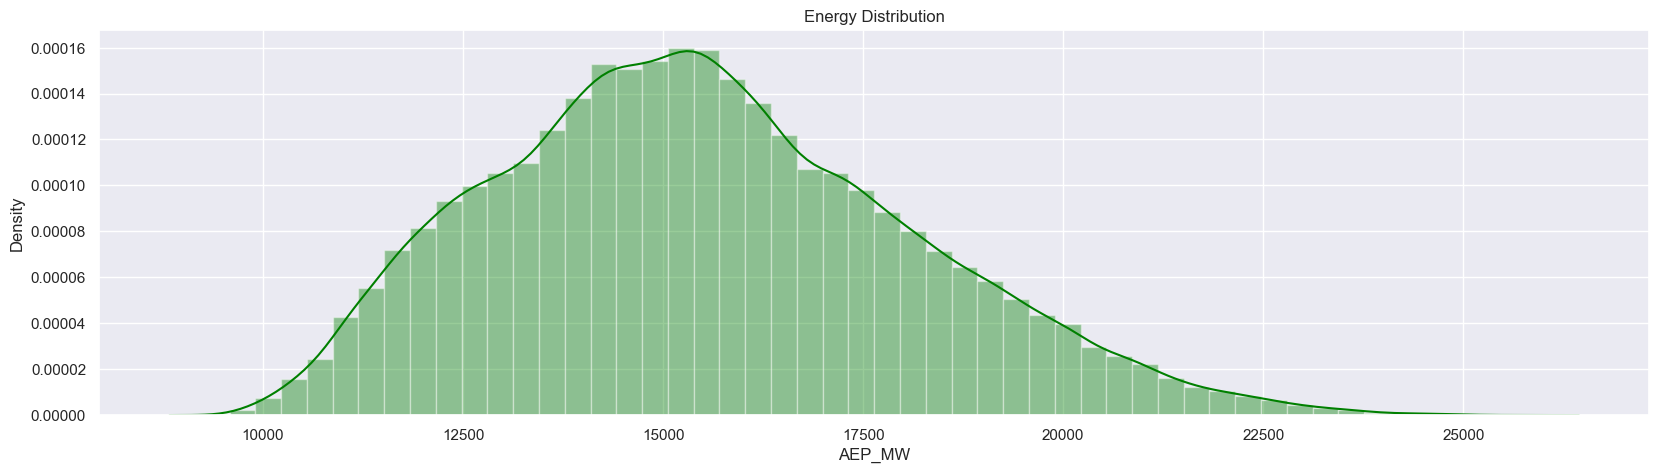

In [255]:
# energy distribution plot

sns.set(rc={"figure.figsize":(20, 5)})
sns.distplot(df["AEP_MW"],color="green")
plt.title("Energy Distribution")

Text(0.5, 1.0, 'Energy Used vs Time')

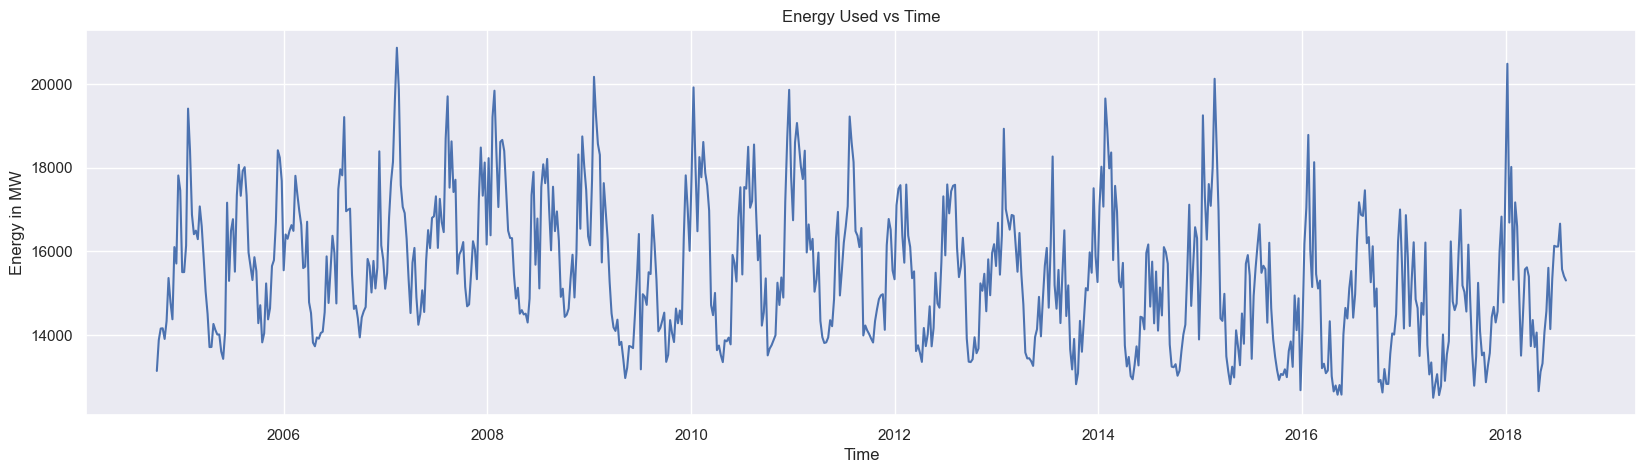

In [322]:
# plotting energy vs time

ener=dataset.resample('W').mean()
sns.lineplot(ener["AEP_MW"])
plt.xlabel("Time")
plt.ylabel("Energy in MW")
plt.title("Energy Used vs Time")

## Resampling of Data (DownSampling)

In [256]:
#chossing required columns for model and then resampling it such that the values at interval of 8 hrs are taken

df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)
dataset=df.iloc[:,0:1]
dataset.head()
dataset=dataset.resample('480min').mean()

In [257]:
dataset.head()

,AEP_MW
Datetime,
2004-10-01 00:00:00,12179.428571
2004-10-01 08:00:00,15256.750000
2004-10-01 16:00:00,15154.250000
2004-10-02 00:00:00,11743.375000
2004-10-02 08:00:00,13644.125000


In [259]:
print(df.shape)
dataset.shape

(121273, 7)


(15163, 1)

Train - Test Splitting

In [260]:
Train_df=dataset[:10000]
Train_df.head()

,AEP_MW
Datetime,
2004-10-01 00:00:00,12179.428571
2004-10-01 08:00:00,15256.750000
2004-10-01 16:00:00,15154.250000
2004-10-02 00:00:00,11743.375000
2004-10-02 08:00:00,13644.125000


In [261]:
Test_df=dataset[10000:]
Test_df.shape

(5163, 1)

In [262]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2004-10-01 00:00:00 to 2013-11-16 00:00:00
Freq: 480T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AEP_MW  10000 non-null  float64
dtypes: float64(1)
memory usage: 156.2 KB


In [263]:
Test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5163 entries, 2013-11-16 08:00:00 to 2018-08-03 00:00:00
Freq: 480T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AEP_MW  5163 non-null   float64
dtypes: float64(1)
memory usage: 80.7 KB


In [264]:
from sklearn.preprocessing import MinMaxScaler

# normalising the values in the range of 0 to 1
norm=MinMaxScaler(feature_range=(0, 1))
Train_df=norm.fit_transform(Train_df)

In [265]:
print(type(Train_df))

<class 'numpy.ndarray'>


In [266]:
#converting the train data so as to make it fit for lstm model

X_Train=[]
Y_Train=[]

# Here we will take timestamps as 50
tstamp=50
for i in range(0,Train_df.shape[0]-50):
    X_Train.append(Train_df[i:i+tstamp])
    Y_Train.append(Train_df[i+tstamp])

X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

In [267]:
print(X_Train[0].shape)
print(len(X_Train))

(50, 1)
9950


In [268]:
#reshaping it into typical input shape for LSTM model -> (sample points, timestamp,1)

X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(9950, 50, 1)

## LSTM Model

In [269]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
from tensorflow.keras.layers import Dense, Dropout

In [270]:
# here we are using only 3 LSTM layers as 2-3 LSTM layers are appropriate for providing good result

#initializing model
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_Train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [271]:
model.fit(X_Train, Y_Train, epochs = 50, batch_size = 30)

Epoch 1/50
332/332 [==============================] - 37s 71ms/step - loss: 0.0250
Epoch 2/50
332/332 [==============================] - 25s 74ms/step - loss: 0.0193
Epoch 3/50
332/332 [==============================] - 24s 74ms/step - loss: 0.0184
Epoch 4/50
332/332 [==============================] - 24s 73ms/step - loss: 0.0183
Epoch 5/50
332/332 [==============================] - 24s 73ms/step - loss: 0.0179
Epoch 6/50
332/332 [==============================] - 24s 73ms/step - loss: 0.0177
Epoch 7/50
332/332 [==============================] - 24s 73ms/step - loss: 0.0172
Epoch 8/50
332/332 [==============================] - 24s 74ms/step - loss: 0.0169
Epoch 9/50
332/332 [==============================] - 24s 72ms/step - loss: 0.0161
Epoch 10/50
332/332 [==============================] - 23s 71ms/step - loss: 0.0118
Epoch 11/50
332/332 [==============================] - 23s 69ms/step - loss: 0.0065
Epoch 12/50
332/332 [==============================] - 19s 58ms/step - loss: 0.0055
E

## Prediction and Visualization

In [272]:
# reshaping,normalization of test data and conversion of its dimensionality so that LSTM can predict the values
Testdata=Test_df[:].values
Testdata = Testdata.reshape(-1,1)
Testdata.shape

(5163, 1)

In [280]:
Testdata=Testdata.reshape(-1,1)
Testdata=norm.transform(Testdata)
X_Test=[]
Y_Test=[]

# Here we will take timestamps as 50
tstamp=50
for i in range(0,Test_df.shape[0]-50):
    X_Test.append(Testdata[i:i+tstamp])
    Y_Test.append(Testdata[i+tstamp])

X_Test = np.array(X_Test)
Y_Test = np.array(Y_Test)

X_Test = np.reshape(X_Test, newshape=(X_Test.shape[0], X_Test.shape[1], 1))
X_Test.shape

(5113, 50, 1)

In [274]:
pred=model.predict(X_Test)

160/160 [==============================] - 5s 19ms/step


In [275]:
# inverse transform to getr the actual value

pred = norm.inverse_transform(pred)

In [292]:
#converting it into final dataframe where we have dates , Actual Power Used and Predicted Power

dates=Test_df.index.to_list()
dates=dates[50:]
Final_df=pd.DataFrame(data={
    "Date":dates,
    "Actual Power Used":Test_df[50:]["AEP_MW"],
    "Predicted Power": [j[0] for j in pred]
})

In [293]:
Final_df.head()

,Date,Actual Power Used,Predicted Power
Datetime,,,
2013-12-03 00:00:00,2013-12-03 00:00:00,14393.500,14754.318359
2013-12-03 08:00:00,2013-12-03 08:00:00,16210.250,16421.851562
2013-12-03 16:00:00,2013-12-03 16:00:00,15856.375,16287.974609
2013-12-04 00:00:00,2013-12-04 00:00:00,13539.500,14166.833008
2013-12-04 08:00:00,2013-12-04 08:00:00,15210.875,15683.388672


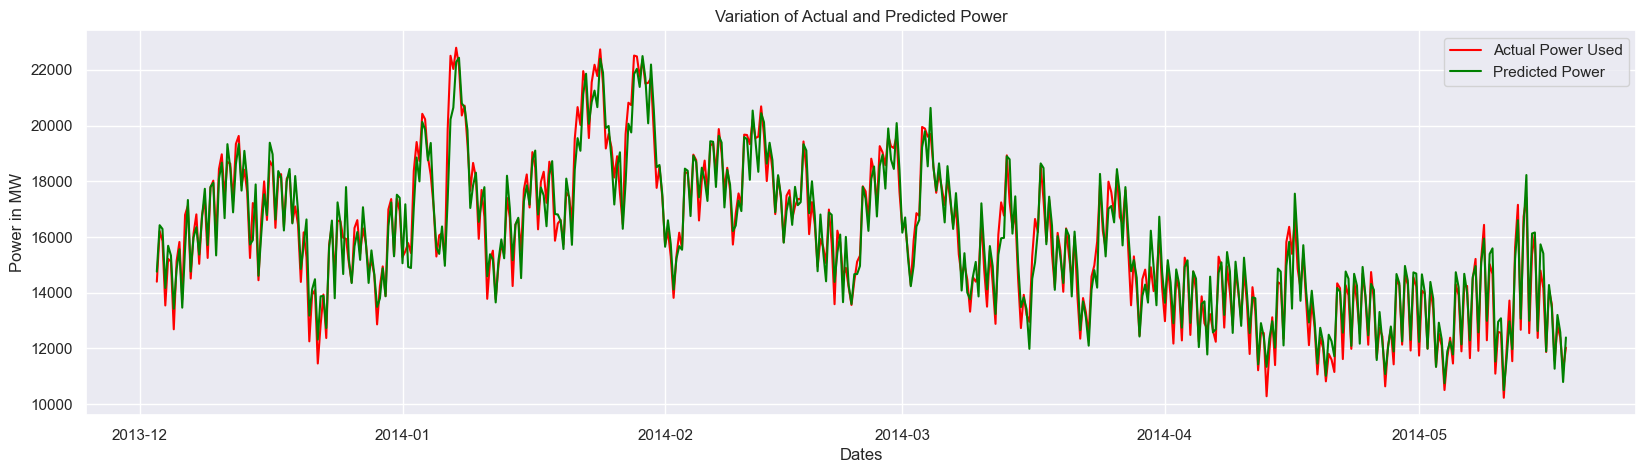

In [314]:
#plotting the graphs of actual power, predicted power vs Date
# I am plotting only 500 values for better visualization

plt.plot(Final_df["Date"][:500],Final_df["Actual Power Used"][:500],color="red")
plt.plot(Final_df["Date"][:500],Final_df["Predicted Power"][:500],color="green")
plt.legend(["Actual Power Used","Predicted Power"])
plt.xlabel("Dates")
plt.ylabel("Power in MW")
plt.title("Variation of Actual and Predicted Power")
plt.show()